In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Bidirectional

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(0)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

model=Sequential()
model.add(Embedding(10000, 200))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.build(input_shape=(None, 100))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
model_checkpoint = ModelCheckpoint('./model/imdb_cnn_and_lstm/best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 200)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 24, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,393 (8.28 MB)

 Trainable params: 2,171,393 (8.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7117 - loss: 0.5063
Epoch 1: val_loss improved from inf to 0.27014, saving model to ./model/imdb_cnn_and_lstm/best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 87s 206ms/step - accuracy: 0.7119 - loss: 0.5060 - val_accuracy: 0.8888 - val_loss: 0.2701 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9130 - loss: 0.2244
Epoch 2: val_loss did not improve from 0.27014
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 232ms/step - accuracy: 0.9130 - loss: 0.2243 - val_accuracy: 0.8824 - val_loss: 0.2808 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9415 - loss: 0.1586
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_loss did not improve from 0.27014
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 213ms/step - accuracy: 0.9415 - loss: 0.1586 - val_accuracy: 0.8559 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━

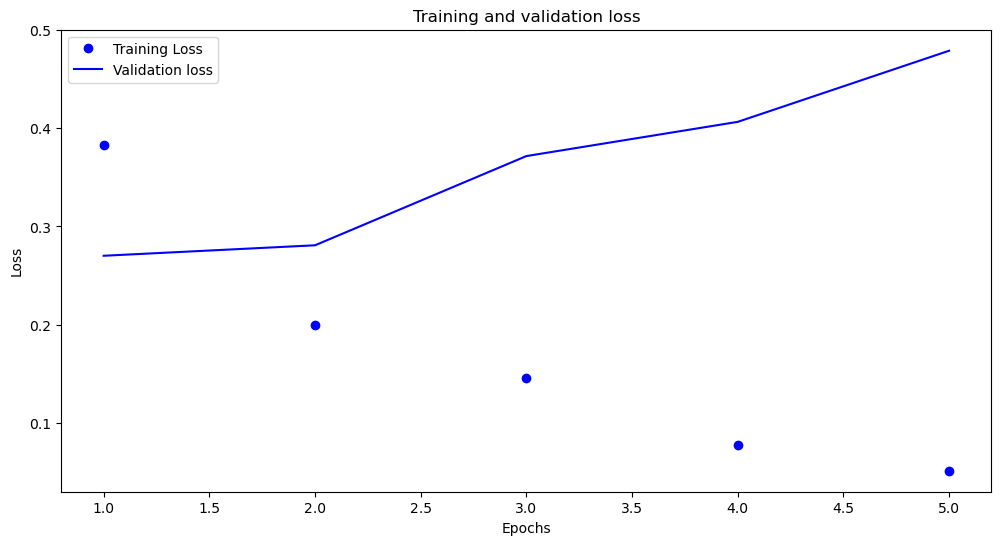

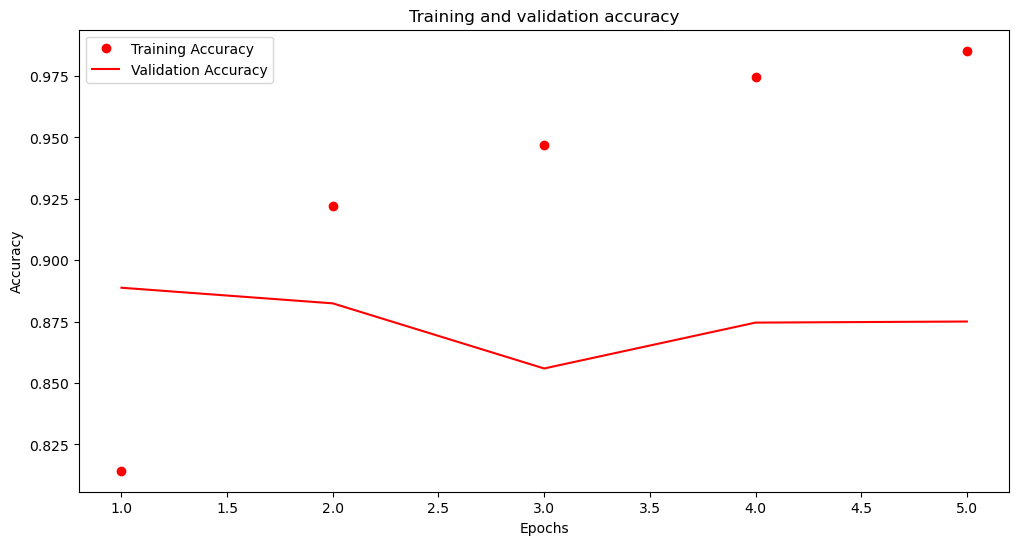

In [12]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

#graph
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()